In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
life = pd.read_csv('F:\\data science\\project\\Life_Expectancy_Data.csv')

In [4]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
#missing values
print(life.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [8]:
#replacing missing values with mean/median vals
median = life['Life expectancy '].median()
life['Life expectancy '].fillna(median, inplace=True)

In [9]:
life.Alcohol.value_counts()

0.01     288
0.03      15
0.04      13
0.09      12
0.02      12
        ... 
8.98       1
5.86       1
9.03       1
6.87       1
13.28      1
Name: Alcohol, Length: 1076, dtype: int64

In [10]:
life.Alcohol.fillna(0.01,inplace=True)

In [11]:
print(life.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [12]:
b=life.GDP.median()
life.GDP.fillna(b,inplace=True)

In [13]:
life.Schooling.value_counts()

12.9    58
13.3    52
12.5    49
12.8    46
12.3    44
        ..
20.6     1
3.0      1
18.9     1
3.1      1
4.2      1
Name: Schooling, Length: 173, dtype: int64

In [14]:
missing_col = ['Schooling']
for i in missing_col:
 life.loc[life.loc[:,i].isnull(),i]=life.loc[:,i].mean()

In [15]:
print(life.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                            0
dtype: int64


In [16]:
x = ['Population']
for i in x:
 life.loc[life.loc[:,i].isnull(),i]=life.loc[:,i].mean()

In [17]:
print(life.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                            0
dtype: int64


In [18]:
y = ['Hepatitis B']
for i in y:
 life.loc[life.loc[:,i].isnull(),i]=life.loc[:,i].mean()

In [19]:
y = ['Total expenditure']
for i in y:
 life.loc[life.loc[:,i].isnull(),i]=life.loc[:,i].mean()

In [20]:
y = ['Income composition of resources']
for i in y:
 life.loc[life.loc[:,i].isnull(),i]=life.loc[:,i].mean()

In [21]:
#missing values replaced 
print(life.isnull().sum())

Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                    10
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
 BMI                               34
under-five deaths                   0
Polio                              19
Total expenditure                   0
Diphtheria                         19
 HIV/AIDS                           0
GDP                                 0
Population                          0
 thinness  1-19 years              34
 thinness 5-9 years                34
Income composition of resources     0
Schooling                           0
dtype: int64


In [22]:
 #excluding the object variables and considering only the numerical variables
df=life.select_dtypes(exclude='object').head()

In [23]:
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [24]:
#converting the float to int datatype for chi square test
df = df.astype({"Life expectancy ":'int64'}) 

In [25]:
X=df.drop('Life expectancy ',axis=1)
y=df['Life expectancy ']

In [26]:
#in the output 1st array represents the chi square values and 2nd array represents p-values
chi_scores=chi2(X,y)
chi_scores

(array([2.48385494e-03, 2.14232765e-01, 3.64457831e-01, 1.50463277e-33,
        2.32358599e+00, 7.66871166e-04, 1.40783266e+02, 6.62527594e-02,
        6.07700893e-01, 5.11120690e+01, 2.20264317e-05, 7.66871166e-04,
        0.00000000e+00, 1.25821883e+01, 3.19318907e+07, 1.76553672e-02,
        1.36414882e-02, 2.99850555e-04, 7.30223124e-03]),
 array([9.60251255e-01, 6.43469843e-01, 5.46040833e-01, 1.00000000e+00,
        1.27425965e-01, 9.77907454e-01, 1.79446483e-32, 7.96873003e-01,
        4.35654780e-01, 8.72402568e-13, 9.96255356e-01, 9.77907454e-01,
        1.00000000e+00, 3.89440471e-04, 0.00000000e+00, 8.94293424e-01,
        9.07021094e-01, 9.86184367e-01, 9.31901185e-01]))

In [27]:
p_values=pd.Series(chi_scores[1],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values

Alcohol                            1.000000e+00
 HIV/AIDS                          1.000000e+00
Total expenditure                  9.962554e-01
Income composition of resources    9.861844e-01
Diphtheria                         9.779075e-01
Hepatitis B                        9.779075e-01
Year                               9.602513e-01
Schooling                          9.319012e-01
 thinness 5-9 years                9.070211e-01
 thinness  1-19 years              8.942934e-01
 BMI                               7.968730e-01
Adult Mortality                    6.434698e-01
infant deaths                      5.460408e-01
under-five deaths                  4.356548e-01
percentage expenditure             1.274260e-01
GDP                                3.894405e-04
Polio                              8.724026e-13
Measles                            1.794465e-32
Population                         0.000000e+00
dtype: float64

<AxesSubplot:>

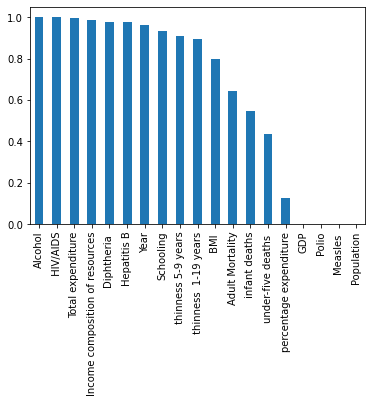

In [28]:
p_values.plot.bar() #the features with correlation close to 1 are highly affecting the life expectancy

In [29]:
#Scattered plots

In [30]:

X = life.drop('Life expectancy ', axis = 1).values
y = life['Life expectancy '].values


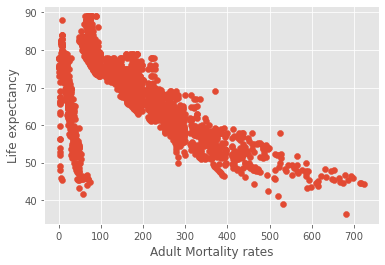

In [31]:
X_adultmortality = X[:,3]
#X_adultmortality
plt.style.use('ggplot')
plt.scatter(X_adultmortality,y)
plt.xlabel('Adult Mortality rates')
plt.ylabel('Life expectancy')
plt.show()

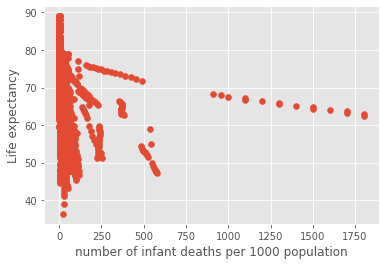

In [32]:
X_infantdeaths = X[:,4]
#X_infantdeaths
plt.style.use('ggplot')
plt.scatter(X_infantdeaths,y)
plt.xlabel('number of infant deaths per 1000 population')
plt.ylabel('Life expectancy')
plt.show()

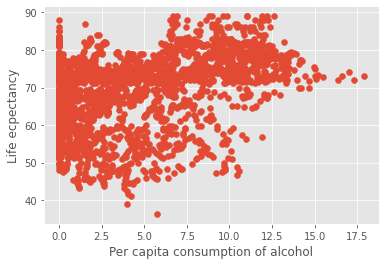

In [33]:
X_alcohol = X[:,5]
#X_alcohol
plt.style.use('ggplot')
plt.scatter(X_alcohol,y)
plt.xlabel('Per capita consumption of alcohol')
plt.ylabel('Life ecpectancy')
plt.show()

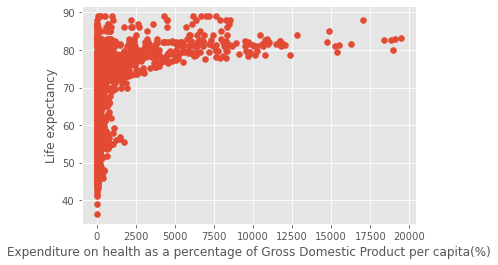

In [34]:
X_expenditure = X[:,6]
#X_expenditure
plt.style.use('ggplot')
plt.scatter(X_expenditure,y)
plt.xlabel('Expenditure on health as a percentage of Gross Domestic Product per capita(%)')
plt.ylabel('Life expectancy')
plt.show()

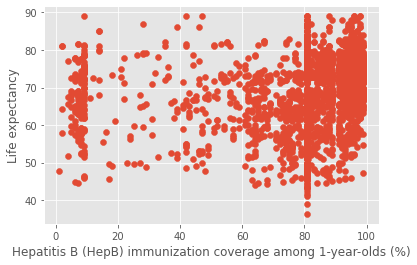

In [ ]:
X_hepatitisB = X[:,7]
#X_hepatitisB
plt.style.use('ggplot')
plt.scatter(X_hepatitisB,y)
plt.xlabel('Hepatitis B (HepB) immunization coverage among 1-year-olds (%)')
plt.ylabel('Life expectancy')
plt.show()

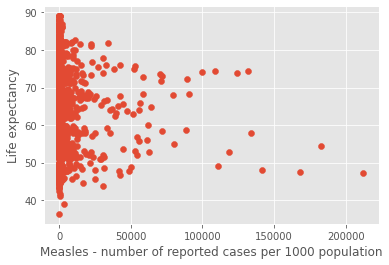

In [ ]:
X_measles = X[:,8]
X_measles
plt.style.use('ggplot')
plt.scatter(X_measles,y)
plt.xlabel('Measles - number of reported cases per 1000 population')
plt.ylabel('Life expectancy')
plt.show()

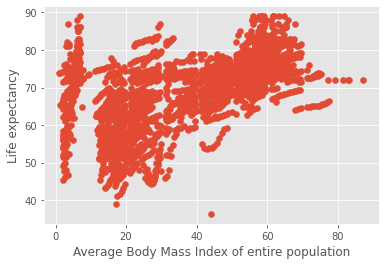

In [ ]:
X_bmi = X[:,9]
#X_bmi
plt.style.use('ggplot')
plt.scatter(X_bmi,y)
plt.xlabel('Average Body Mass Index of entire population')
plt.ylabel('Life expectancy')
plt.show()

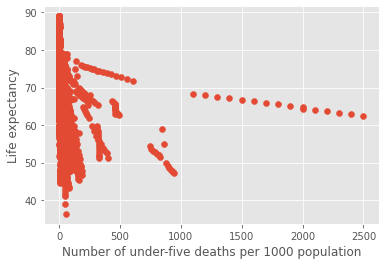

In [ ]:
X_under5deaths = X[:,10]
#X_under5deaths
plt.style.use('ggplot')
plt.scatter(X_under5deaths,y)
plt.xlabel('Number of under-five deaths per 1000 population')
plt.ylabel('Life expectancy')
plt.show()

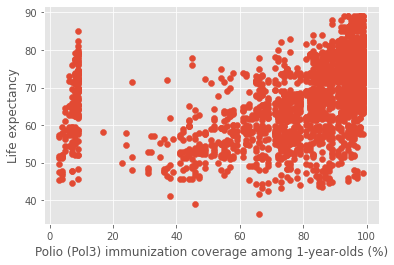

In [ ]:

X_polio = X[:,11]
#X_polio
plt.style.use('ggplot')
plt.scatter(X_polio,y)
plt.xlabel('Polio (Pol3) immunization coverage among 1-year-olds (%)')
plt.ylabel('Life expectancy')
plt.show()

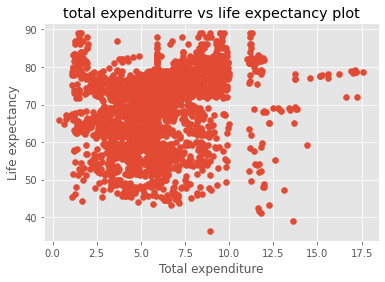

In [ ]:

X_total_expenditure = X[:,12]
#X_total_expenditure
plt.style.use('ggplot')
plt.scatter(X_total_expenditure,y)
plt.title('total expenditurre vs life expectancy plot')
plt.xlabel('Total expenditure')
plt.ylabel('Life expectancy')
plt.show()

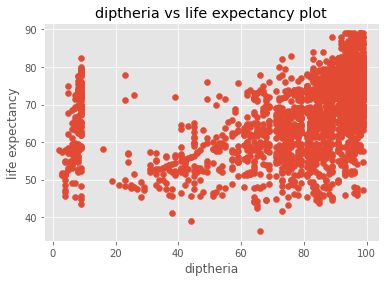

In [ ]:
X_Diptheria = X[:,13]
#X_Diptheria
plt.scatter(X_Diptheria,y)
plt.style.use('ggplot')
plt.title('diptheria vs life expectancy plot')
plt.xlabel('diptheria')
plt.ylabel('life expectancy')
plt.show()

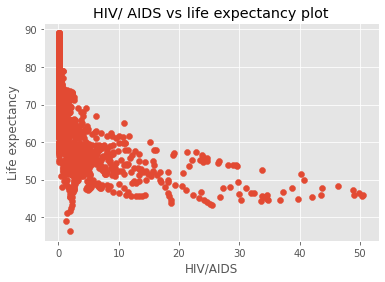

In [ ]:

X_HIV = X[:,14]
#X_HIV_AIDS
plt.style.use('ggplot')
plt.scatter(X_HIV , y)
plt.title('HIV/ AIDS vs life expectancy plot')
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')
plt.show()

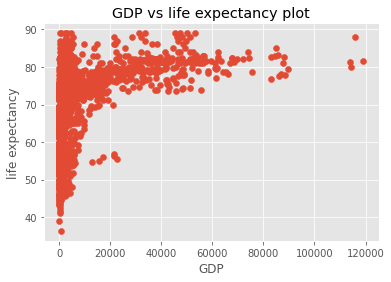

In [ ]:
X_GDP = X[:,15]
#X_GDP
plt.style.use('ggplot')
plt.scatter(X_GDP,y)
plt.title('GDP vs life expectancy plot')
plt.xlabel('GDP')
plt.ylabel('life expectancy')
plt.show()

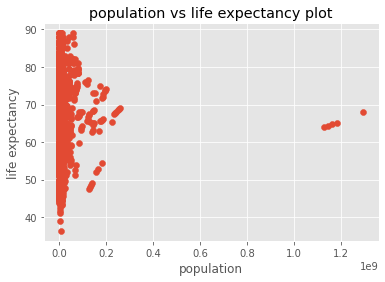

In [ ]:
X_population = X[:,16]
#X_population
plt.style.use('ggplot')
plt.scatter(X_population,y)
plt.title('population vs life expectancy plot')
plt.xlabel('population')
plt.ylabel('life expectancy')
plt.show()

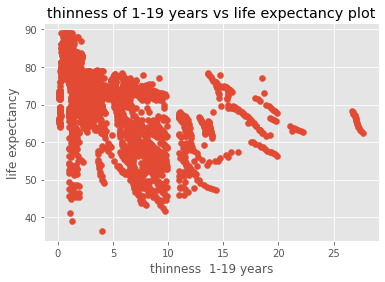

In [ ]:
X_thinness1_9 = X[:,17]
#X_thinness1_9
plt.scatter(X_thinness1_9,y)
plt.title('thinness of 1-19 years vs life expectancy plot')
plt.xlabel('thinness  1-19 years')
plt.ylabel('life expectancy')
plt.show()

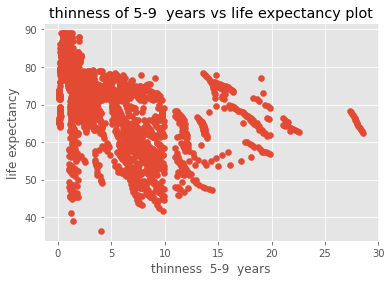

In [ ]:
X_thinness5_9 = X[:,18]
#X_thinness5_9
plt.style.use('ggplot')
plt.scatter(X_thinness5_9,y)
plt.title('thinness of 5-9  years vs life expectancy plot')
plt.xlabel('thinness  5-9  years')
plt.ylabel('life expectancy')
plt.show()

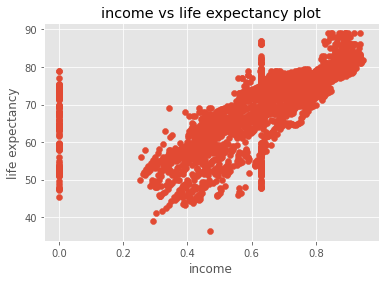

In [ ]:
X_income =X[:,19]
#X_income
plt.style.use('ggplot')
plt.scatter(X_income,y)
plt.title('income vs life expectancy plot')
plt.xlabel('income')
plt.ylabel('life expectancy')
plt.show()

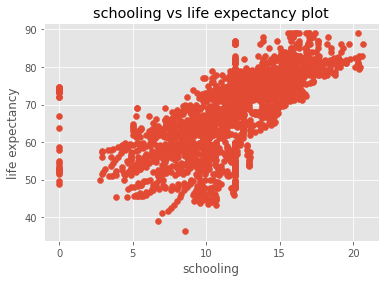

In [ ]:
X_schooling =X[:,20]
#X_schooling
plt.style.use('ggplot')
plt.scatter(X_schooling,y)
plt.title('schooling vs life expectancy plot')
plt.xlabel('schooling')
plt.ylabel('life expectancy')
plt.show()

In [ ]:
# Mean for non numeric values

In [37]:
Status = life.groupby('Status').mean()
Status


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,1.494141,9.289883,2703.600380,85.641992,499.005859,51.803906,1.810547,93.736328,7.453051,93.476562,0.100000,19517.581590,7.940676e+06,1.320703,1.296680,0.831401,15.484285
Developing,2007.522671,67.132028,182.833195,36.384171,3.246401,323.470285,79.948217,2824.926216,35.435326,50.525144,80.170752,5.618483,79.951807,2.088664,3887.739215,1.376908e+07,5.592935,5.635242,0.584529,11.255924


In [38]:
Status.reset_index(inplace=True)

 #Graph betweem non numeric variables

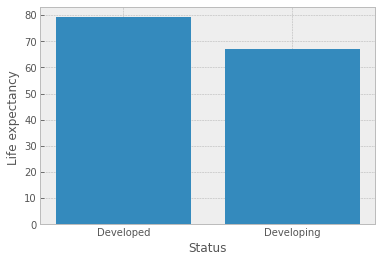

In [39]:
plt.style.use('bmh')

x=Status['Status']
y=Status['Life expectancy ']
plt.xlabel('Status')
plt.ylabel('Life expectancy ')
plt.bar(x,y)

plt.show()

In [ ]:

plt.figure(figsize=(14,80))
x=life['Country']
y=life['Life expectancy ']
plt.xlabel('Life expectancy',fontsize=14)
plt.ylabel('Country ',fontsize=16)
plt.barh(x,y,)
plt.title("Life expectancy of various countries")
plt.show()    


In [ ]:
# Max life expectancy in the whole dataset
life.iloc[life['Life expectancy '].idxmax()]

In [ ]:
# Min life expectancy in the whole dataset
life.iloc[life['Life expectancy '].idxmin()]

In [ ]:
# Mean of life expectancy grouped by country
country = life.groupby('Country').mean()
country

In [ ]:
life_expectancy = country.loc[:,['Life expectancy ']]
life_expectancy

In [ ]:
# Life expectancy rate sorted in ascending way
life_expectancy.sort_values('Life expectancy ')

In [ ]:
# To dsplay all the rows of the dataset
pd.set_option('display.max.rows',life_expectancy.shape[0]+1)

In [ ]:
life_expectancy.sort_values('Life expectancy ')

In [ ]:
# Data of min and max Life expectancy rate
min_max = country.loc[['Sierra Leone','Japan'],:]
min_max

In [ ]:
min_max.reset_index(inplace = True)

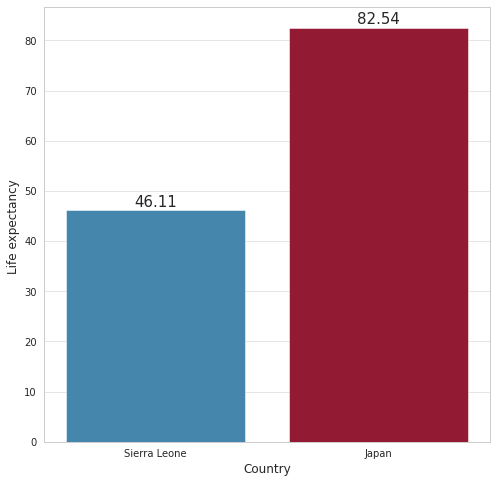

In [ ]:
# Graph of min and max life expectancy rate vs country
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
mm = sns.barplot(x='Country',y='Life expectancy ',data = min_max)
for bar in mm.patches:
    mm.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

In [ ]:
# Top 5 minimum life expectancy rate
min_5=life_expectancy.sort_values('Life expectancy ').head(5)
min_5

,Life expectancy
Country,
Sierra Leone,46.11250
Central African Republic,48.51250
Lesotho,48.78125
Angola,49.01875
Malawi,49.89375


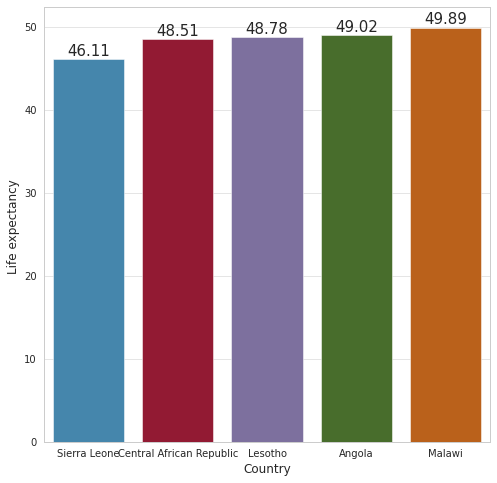

In [ ]:
# Graph of top 5 minimum life expectancy rate vs country
min_5.reset_index(inplace=True)
plt.figure(figsize=(8,8))
min_mortality = sns.barplot(x='Country',y='Life expectancy ',data = min_5)
for bar in min_mortality.patches:
    min_mortality.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

In [ ]:
#  Top 5 max life expectancy rate
max_5=life_expectancy.sort_values('Life expectancy ',ascending=False).head(5)
max_5

,Life expectancy
Country,
Japan,82.53750
Sweden,82.51875
Iceland,82.44375
Switzerland,82.33125
France,82.21875


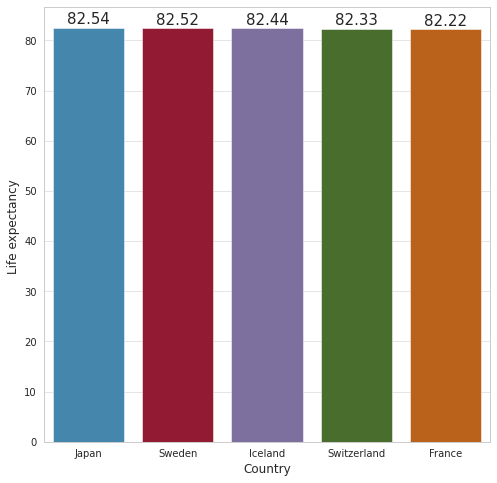

In [ ]:
# Graph of max top 5 life expectancy rate vs country
max_5.reset_index(inplace=True)
plt.figure(figsize=(8,8))
max_mortality = sns.barplot(x='Country',y='Life expectancy ',data = max_5)
for bar in max_mortality.patches:
    max_mortality.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

In [ ]:
df=life.drop('Country',axis=1)
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df['Status']=df['Status'].map({'Developing':'0','Developed':'1'})

In [ ]:
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df.fillna(df.mean(),inplace=True)

In [ ]:
df.isna().any()

Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
 BMI                               False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
 HIV/AIDS                          False
GDP                                False
Population                         False
 thinness  1-19 years              False
 thinness 5-9 years                False
Income composition of resources    False
Schooling                          False
dtype: bool

In [ ]:
x = df.drop('Life expectancy ',axis=1)
y = df['Life expectancy ']

In [ ]:
x

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,0,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,0,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data=scaler.transform(x)

In [ ]:
scaled_data

array([[ 1.6217623 , -0.45939851,  0.79158632, ...,  2.77327898,
        -0.72540055, -0.57993072],
       [ 1.40498625, -0.45939851,  0.85607167, ...,  2.81790246,
        -0.74005007, -0.61056961],
       [ 1.1882102 , -0.45939851,  0.83188966, ...,  2.86252595,
        -0.7693491 , -0.6412085 ],
       ...,
       [-1.19632639, -0.45939851, -0.73994077, ..., -0.79659991,
        -0.97932554, -0.61056961],
       [-1.41310244, -0.45939851,  4.20124926, ..., -0.70735294,
        -0.97932554, -0.6718474 ],
       [-1.62987849, -0.45939851,  4.03197521, ...,  1.41226265,
        -0.94514333, -0.6718474 ]])

In [ ]:
scaled_data.shape

(2938, 20)

In [ ]:
pca=PCA(n_components=0.99)

In [ ]:
sd=scaled_data.astype(np.float64)

In [ ]:
sd

array([[ 1.6217623 , -0.45939851,  0.79158632, ...,  2.77327898,
        -0.72540055, -0.57993072],
       [ 1.40498625, -0.45939851,  0.85607167, ...,  2.81790246,
        -0.74005007, -0.61056961],
       [ 1.1882102 , -0.45939851,  0.83188966, ...,  2.86252595,
        -0.7693491 , -0.6412085 ],
       ...,
       [-1.19632639, -0.45939851, -0.73994077, ..., -0.79659991,
        -0.97932554, -0.61056961],
       [-1.41310244, -0.45939851,  4.20124926, ..., -0.70735294,
        -0.97932554, -0.6718474 ],
       [-1.62987849, -0.45939851,  4.03197521, ...,  1.41226265,
        -0.94514333, -0.6718474 ]])

In [ ]:
sd.shape

(2938, 20)

In [ ]:
pca.fit(sd)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca=pca.transform(sd)

In [ ]:
x_pca.shape

(2938, 17)

In [ ]:
principalDf = pd.DataFrame(data = x_pca)
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,3.895913,0.264381,0.481483,0.073520,2.060582,-1.887901,-1.734825,-1.520998,-1.041859,0.369401,1.104714,0.775139,-0.342293,1.047158,-0.061882,-1.553328,0.211584
1,3.487551,0.125574,-0.244503,0.695722,1.788665,-1.554082,-1.736740,-1.556466,-0.986952,-0.479215,0.258517,-0.073838,-0.195994,1.048037,-0.138338,-0.153293,0.120311
2,3.553704,0.368175,-0.410796,0.772066,1.619915,-1.436218,-1.685994,-1.642761,-0.583030,-0.386916,0.195339,0.231665,-0.144318,1.149971,-0.195743,-0.079802,0.105393
3,3.507465,0.259435,-0.513485,1.007245,1.451101,-1.216907,-1.878767,-1.487783,-0.905101,-0.684452,0.219863,0.002927,-0.222132,1.099723,-0.270912,-0.049294,0.098965
4,3.655313,0.242162,-0.581020,1.077705,1.412948,-0.934627,-1.717356,-1.514622,-0.879159,-0.660028,0.231073,-0.059667,-0.182852,1.119908,-0.287903,-0.067607,0.071899


In [ ]:
PC_data=principalDf.rename(columns={0:'PC1',1:'PC2',1:'PC2',2:'PC3',3:'PC4',4:'PC5',5:'PC6',6:'PC7',7:'PC8',8:'PC9',9:'PC10',10:'PC11',11:'PC12',12:'PC13',13:'PC14',14:'PC15',15:'PC16',16:'PC17',})

In [ ]:
df2 = df['Life expectancy ']

In [ ]:
data_set = pd.concat([PC_data,df2],axis=1)

In [ ]:
data_set

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,Life expectancy
0,3.895913,0.264381,0.481483,0.073520,2.060582,-1.887901,-1.734825,-1.520998,-1.041859,0.369401,1.104714,0.775139,-0.342293,1.047158,-0.061882,-1.553328,0.211584,65.0
1,3.487551,0.125574,-0.244503,0.695722,1.788665,-1.554082,-1.736740,-1.556466,-0.986952,-0.479215,0.258517,-0.073838,-0.195994,1.048037,-0.138338,-0.153293,0.120311,59.9
2,3.553704,0.368175,-0.410796,0.772066,1.619915,-1.436218,-1.685994,-1.642761,-0.583030,-0.386916,0.195339,0.231665,-0.144318,1.149971,-0.195743,-0.079802,0.105393,59.9
3,3.507465,0.259435,-0.513485,1.007245,1.451101,-1.216907,-1.878767,-1.487783,-0.905101,-0.684452,0.219863,0.002927,-0.222132,1.099723,-0.270912,-0.049294,0.098965,59.5
4,3.655313,0.242162,-0.581020,1.077705,1.412948,-0.934627,-1.717356,-1.514622,-0.879159,-0.660028,0.231073,-0.059667,-0.182852,1.119908,-0.287903,-0.067607,0.071899,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,3.841210,-1.988907,2.490843,4.391703,-2.437905,-3.067789,2.169145,0.506288,0.559687,-0.786294,0.782467,0.087436,0.751960,-0.046083,-0.186486,-0.004789,-0.006681,44.3
2934,4.867247,-1.975910,4.791964,3.388764,-1.911783,-3.542622,2.799382,-0.276332,0.454353,-1.511787,0.425132,0.345833,0.985424,-0.168981,-0.051604,-2.178767,0.165789,44.5
2935,1.521891,-1.788947,2.266936,2.504304,-2.756255,-1.443457,2.048978,0.988691,0.618265,-1.634440,0.818414,1.524638,2.842951,-3.453066,2.145025,0.052022,0.061224,44.8
2936,2.879168,-2.670140,2.737213,4.393609,-3.471666,-2.932954,3.387738,1.969146,1.265336,-0.901344,0.627301,0.432667,1.515972,-1.780110,-0.427242,-0.002957,0.161423,45.3


In [ ]:
pca.explained_variance_

array([5.85275685, 2.66050611, 1.83538599, 1.38772311, 1.27441904,
       1.04901717, 0.85275106, 0.80445761, 0.75705794, 0.61213341,
       0.56104599, 0.49214346, 0.42767704, 0.41473247, 0.36722086,
       0.31274265, 0.19322103])

In [ ]:
pca_ratio=pca.explained_variance_ratio_

Text(0, 0.5, 'cumulative_explained_variance')

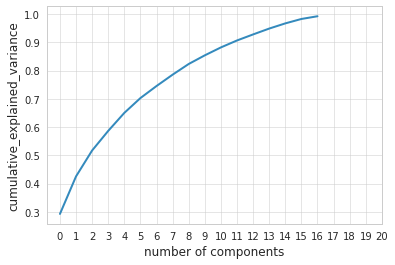

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.ylabel('cumulative_explained_variance')

In [ ]:
#tsne

In [ ]:
from sklearn.manifold import TSNE

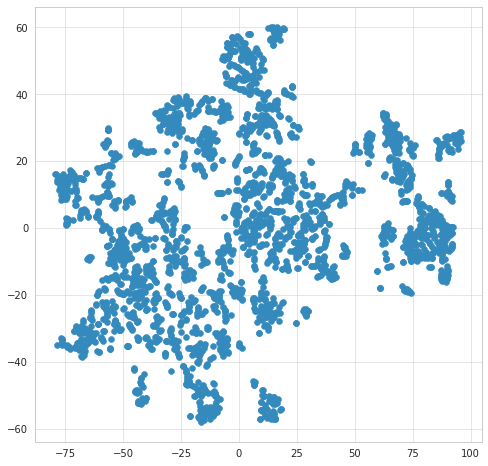

In [ ]:
x_pca_tsne = TSNE(n_components=2).fit_transform(x_pca)
fig = plt.figure(figsize=(8,8))
#s = fig.add_subplot(1, 1, 1, xlabel='$x$', ylabel='$y$')
plt.scatter(x_pca_tsne[:, 0], x_pca_tsne[:, 1])

In [ ]:
#elbow point
from sklearn.cluster import KMeans
inertias = []
K = range(3,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    inertias.append(kmeanModel.inertia_)

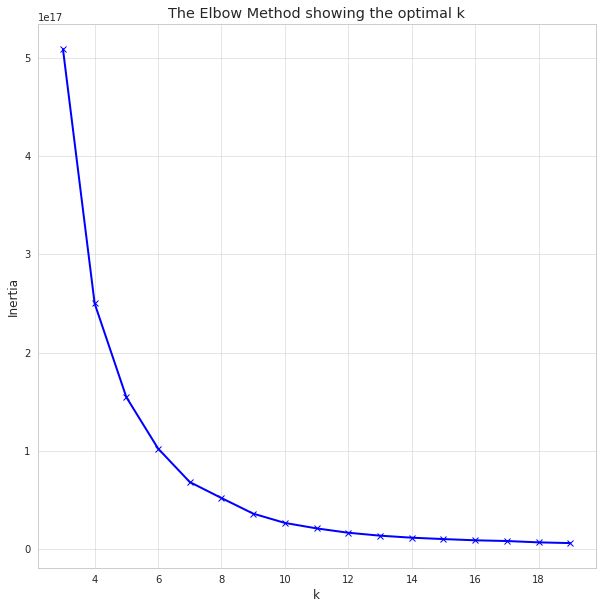

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

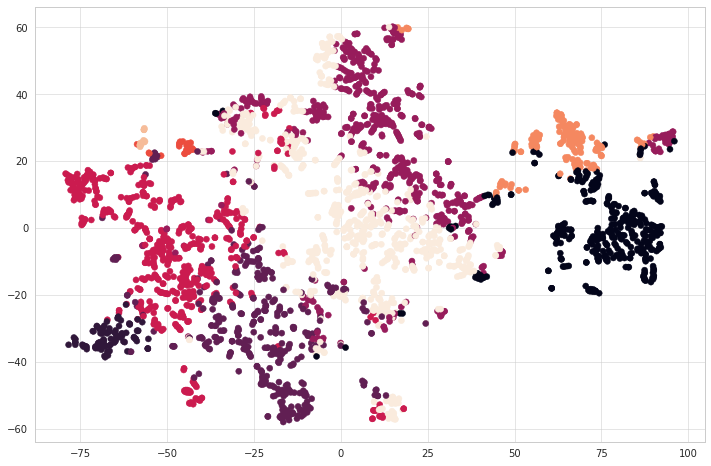

In [ ]:
kmeans = KMeans(n_clusters=9, random_state=20)
kmeans.fit(x_pca)
plt.figure(figsize=(12,8))
plt.scatter(x_pca_tsne[:, 0], x_pca_tsne[:, 1], c=kmeans.labels_)
plt.show()

In [ ]:
#Ridge and Lasso regression

In [ ]:
import pandas as pd
X = df.drop('Life expectancy ', axis = 1).values
y = df['Life expectancy '].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 50)

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
#y_pred
ridge.score(X_test, y_test)

0.8046303086692306

In [ ]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(ridge, X, y, cv=5)

In [ ]:
import numpy as np
np.mean(cv_results)

0.7826558912216949

In [ ]:
# grid search hyperparameters for ridge regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 50)

# define model
model = Ridge()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=50)
# define grid
grid = dict()
grid['alpha'] = [0.001,0.01,0.1,0,1,10,100]
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_test, y_test)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.112
Config: {'alpha': 0}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.34542e-17): result may not be accurate.
  overwrite_a=True).T


In [ ]:
import pandas as pd
X = df.drop('Life expectancy ', axis = 1).values
y = df['Life expectancy '].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 50)

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0, normalize = True)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
#y_pred
ridge.score(X_test, y_test)

0.8179440792269145

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0, normalize = True)
lasso.fit(X_train, y_train)
#y_pred = ridge.predict(X_test)
lasso.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19009.048961897664, tolerance: 21.09375349106383
  positive)


0.817897983245118

In [ ]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(lasso, X, y, cv=5)
import numpy as np
np.mean(cv_results)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18316.350205687322, tolerance: 20.234852276170212
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dis

0.790750340210538

In [ ]:
# define model
model = Lasso()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=50)
# define grid
grid = dict()
grid['alpha'] = [0.001,0.01,0.1,0,1,10,100]
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_test, y_test)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.112
Config: {'alpha': 0}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4711.884937831054, tolerance: 5.462205938775509
  positive)


In [ ]:
from sklearn.linear_model import LinearRegression
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)
import numpy as np
np.mean(cv_results)

[0.81191287 0.80754705 0.79610944 0.7037116  0.81458862]


0.7867739187347385

In [ ]:
#Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data_set.drop('Life expectancy ',axis=1)
y = data_set['Life expectancy ']

In [ ]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print(X_pca_train.shape, y_pca_train.shape)
print(X_pca_test.shape, y_pca_test.shape)

(2350, 17) (2350,)
(588, 17) (588,)


In [ ]:
from sklearn.linear_model import LinearRegression
test = LinearRegression()
y_train_pred = []
y_test_pred = []

In [ ]:
l = []
for c in X_pca_train:
    l.append(c)
    
    test.fit(X_pca_train[[x for x in l]], y_pca_train)
    print(test.coef_)
    y_test_pred.append(test.predict(X_pca_test[[x for x in l]]))
    y_train_pred.append(test.predict(X_pca_train[[x for x in l]]))

print(len(y_train_pred), len(y_test_pred))

[-3.10715817]
[-3.07502141  1.56887917]
[-3.06826234  1.58042886 -1.34269707]
[-3.04589009  1.59110097 -1.34791168 -1.79425452]
[-3.05198055  1.5696647  -1.3398657  -1.77134058  0.9931745 ]
[-3.05319109  1.55526725 -1.33516506 -1.75476574  0.99403569  0.90417513]
[-3.05407361  1.55072192 -1.33344407 -1.75027717  0.99284195  0.90320762
 -0.35508628]
[-3.04603188  1.56545665 -1.33720839 -1.74015198  0.99305461  0.89542831
 -0.34597475 -1.60045851]
[-3.0493809   1.55357921 -1.33740312 -1.7367742   0.9968214   0.89901371
 -0.34680564 -1.59879708 -0.2273381 ]
[-3.05307274  1.54385158 -1.33735649 -1.73557159  0.99933342  0.9104078
 -0.34679482 -1.59744637 -0.24750072 -0.86293878]
[-3.05252212  1.54655204 -1.33534702 -1.73480066  0.99951642  0.90873596
 -0.34684684 -1.59459143 -0.24627212 -0.86359573 -0.27447645]
[-3.05170168  1.55003046 -1.33683639 -1.73597388  0.99913509  0.907968
 -0.34610016 -1.59934988 -0.23950244 -0.86055129 -0.27389692  0.24710921]
[-3.05261452  1.549772   -1.33660302 

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

x = 0
# r2 = []
train_rmse = []
test_rmse = []

for i in range(17):
    test_rmse.append(np.sqrt(mean_squared_error(y_pca_test, y_test_pred[i])))
    train_rmse.append(np.sqrt(mean_squared_error(y_pca_train, y_train_pred[i])))


In [ ]:
print(len(train_rmse), len(test_rmse))

17 17


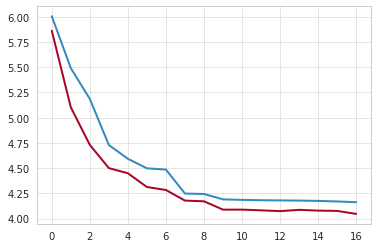

In [ ]:
#graph between training error and test error
plt.plot(train_rmse)
plt.plot(test_rmse)

In [ ]:
accuracy = test.score(X_pca_test,y_pca_test)
print('Accuracy: {}%'.format(int(round(accuracy*100))))

Accuracy: 81%


In [ ]:
# XGBoost Regression
import xgboost as xgb
from sklearn import metrics

In [ ]:
X_xgb = data_set[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']]
y_xgb = data_set['Life expectancy ']

In [ ]:
X_xgb_train,X_xgb_test,y_xgb_train,y_xgb_test= train_test_split(X_xgb,y_xgb,test_size=0.2,random_state= 42)

In [ ]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
  
xgb_r.fit(X_xgb_train, y_xgb_train)
  
pred = xgb_r.predict(X_xgb_test)
  
rmse = np.sqrt(metrics.mean_squared_error(y_xgb_test, pred))
print("RMSE : % f" %(rmse))

[03:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  24.523593


In [ ]:
acc = xgb_r.score(X_xgb_test,y_xgb_test)
print('Accuracy: {}%'.format(int(round(acc*100))))

Accuracy: -594%


In [ ]:
#naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
data_set['Life expectancy_'] = data_set['Life expectancy '].apply(np.round)
data_set


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,Life expectancy,Life expectancy_
0,3.895913,0.264381,0.481483,0.073520,2.060582,-1.887901,-1.734825,-1.520998,-1.041859,0.369401,1.104714,0.775139,-0.342293,1.047158,-0.061882,-1.553328,0.211584,65.0,65.0
1,3.487551,0.125574,-0.244503,0.695722,1.788665,-1.554082,-1.736740,-1.556466,-0.986952,-0.479215,0.258517,-0.073838,-0.195994,1.048037,-0.138338,-0.153293,0.120311,59.9,60.0
2,3.553704,0.368175,-0.410796,0.772066,1.619915,-1.436218,-1.685994,-1.642761,-0.583030,-0.386916,0.195339,0.231665,-0.144318,1.149971,-0.195743,-0.079802,0.105393,59.9,60.0
3,3.507465,0.259435,-0.513485,1.007245,1.451101,-1.216907,-1.878767,-1.487783,-0.905101,-0.684452,0.219863,0.002927,-0.222132,1.099723,-0.270912,-0.049294,0.098965,59.5,60.0
4,3.655313,0.242162,-0.581020,1.077705,1.412948,-0.934627,-1.717356,-1.514622,-0.879159,-0.660028,0.231073,-0.059667,-0.182852,1.119908,-0.287903,-0.067607,0.071899,59.2,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,3.841210,-1.988907,2.490843,4.391703,-2.437905,-3.067789,2.169145,0.506288,0.559687,-0.786294,0.782467,0.087436,0.751960,-0.046083,-0.186486,-0.004789,-0.006681,44.3,44.0
2934,4.867247,-1.975910,4.791964,3.388764,-1.911783,-3.542622,2.799382,-0.276332,0.454353,-1.511787,0.425132,0.345833,0.985424,-0.168981,-0.051604,-2.178767,0.165789,44.5,44.0
2935,1.521891,-1.788947,2.266936,2.504304,-2.756255,-1.443457,2.048978,0.988691,0.618265,-1.634440,0.818414,1.524638,2.842951,-3.453066,2.145025,0.052022,0.061224,44.8,45.0
2936,2.879168,-2.670140,2.737213,4.393609,-3.471666,-2.932954,3.387738,1.969146,1.265336,-0.901344,0.627301,0.432667,1.515972,-1.780110,-0.427242,-0.002957,0.161423,45.3,45.0


In [ ]:
X_naive = data_set[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']]
y_naive = data_set['Life expectancy_']

In [ ]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_naive,y_naive,test_size = 0.2, random_state = 42)
print(X_pca_train.shape, y_pca_train.shape)
print(X_pca_test.shape, y_pca_test.shape)

(2350, 9) (2350,)
(588, 9) (588,)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model=GaussianNB()
model.fit(X_pca_train,y_pca_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred=model.predict(X_pca_test)

In [ ]:
y_pred

array([73., 79., 73., 76., 53., 62., 69., 73., 75., 46., 52., 69., 61.,
       57., 75., 69., 53., 82., 73., 82., 80., 82., 74., 72., 74., 73.,
       61., 57., 86., 74., 59., 75., 69., 73., 88., 52., 69., 73., 59.,
       75., 56., 61., 74., 80., 75., 56., 79., 74., 69., 63., 59., 59.,
       75., 73., 73., 52., 86., 57., 57., 63., 79., 56., 75., 73., 53.,
       46., 52., 86., 59., 72., 84., 73., 75., 57., 59., 73., 57., 75.,
       56., 67., 61., 61., 73., 63., 59., 85., 73., 73., 79., 79., 73.,
       52., 73., 76., 76., 73., 76., 73., 73., 59., 88., 57., 47., 53.,
       75., 79., 69., 67., 73., 69., 73., 59., 45., 64., 47., 73., 72.,
       56., 74., 57., 66., 75., 86., 59., 61., 57., 73., 74., 75., 73.,
       75., 88., 54., 73., 54., 74., 73., 77., 78., 75., 73., 66., 61.,
       57., 57., 69., 54., 75., 70., 73., 77., 82., 73., 75., 80., 77.,
       82., 72., 79., 86., 71., 87., 73., 79., 61., 69., 61., 86., 76.,
       73., 86., 75., 73., 69., 73., 69., 73., 61., 59., 75., 84

In [ ]:
acc_naive = model.score(X_pca_test,y_pca_test)
print('Accuracy: {}%'.format(int(round(acc_naive*100))))

Accuracy: 13%


In [ ]:
#Decision tree regression
X_dt = data_set[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']]
y_dt = data_set['Life expectancy_']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dt,y_dt, test_size = 0.05, random_state = 1)

In [ ]:
#fitting decision tree to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
1268,82.0,82.0
2719,58.0,49.0
2710,63.0,74.0
2028,68.0,64.0
351,48.0,46.0
2513,89.0,81.0
2603,68.0,67.0
2873,72.0,73.0
1050,72.0,72.0
1281,79.0,78.0


In [ ]:

y_train_pred = []
y_test_pred = []

t = []
for c in X_train:
    t.append(c)
    
    regressor.fit(X_train[[x for x in t]], y_train)
    y_test_pred.append(regressor.predict(X_test[[x for x in t]]))
    y_train_pred.append(regressor.predict(X_train[[x for x in t]]))

print(len(y_train_pred), len(y_test_pred))

9 9


In [ ]:
regressor.score(X_test, y_test)

0.7969745967486493

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8087259761141261

In [ ]:
#Neural Network using Keras, Tensorflow

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
input_shape = [9]
model = keras.Sequential([layers.Dense(units=1, input_shape=input_shape)])

In [ ]:
w , b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.17621684],
       [ 0.399657  ],
       [ 0.24299729],
       [-0.43278405],
       [-0.2917436 ],
       [ 0.06636244],
       [ 0.71982145],
       [ 0.6362915 ],
       [ 0.5599258 ]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [ ]:
model = keras.Sequential([
    layers.Dense(units=512,activation = 'relu', input_shape=[9]),
    layers.Dense(units=512,activation = 'relu'),
    layers.Dense(units=512,activation = 'relu'),
    layers.Dense(units=1),
])

model.compile(optimizer='adam',loss='mae')

In [ ]:
df_train = data_set.sample(frac=0.8,random_state=0)
df_valid = data_set.drop(df_train.index)
display(df_train.head(5))

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

X_nn_train = df_train[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']]
X_valid = df_valid[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']]
y_nn_train = df_train['Life expectancy ']
y_valid = df_valid['Life expectancy ']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,Life expectancy,Life expectancy_
867,-2.235766,0.283739,-0.736427,-0.278242,1.566726,-1.108188,0.414086,0.981818,0.188192,-0.570497,0.510068,0.096487,-0.335240,-0.247336,-0.402898,0.129711,0.340543,77.3,77.0
1780,1.981252,-0.162472,-1.782929,0.780980,1.484420,-0.911509,-0.962224,-0.526552,-0.516483,0.033187,-0.102894,-0.212178,0.251912,0.536506,0.145558,-0.015483,-0.329631,66.6,67.0
621,3.498627,-1.219121,1.615801,1.118412,0.294389,0.572056,1.132122,-0.321395,-0.457028,1.067692,0.444824,0.587291,-0.514844,0.040247,-0.760417,0.187937,0.034996,52.6,53.0
2715,1.203718,-0.009630,-0.767380,-0.567252,0.680282,-0.966343,-1.060137,0.205431,0.190771,0.158864,-0.555605,0.513942,0.709766,-1.034330,0.597408,0.183820,0.107068,61.5,62.0
2717,1.796173,-0.607126,-0.189062,0.491708,0.053296,-1.453188,-0.596409,0.698059,0.008874,0.211456,-0.554865,-0.365344,-0.173548,-0.358345,-0.557633,0.142274,0.168756,60.0,60.0


In [ ]:
print(X_nn_train.shape,y_nn_train.shape)

(2350, 9) (2350,)


In [ ]:
history = model.fit(X_nn_train,y_nn_train,validation_data=(X_valid,y_valid),batch_size = 256,epochs=10,)

Epoch 1/10
10/10 [==============================] - 1s 30ms/step - loss: 0.2794 - val_loss: 0.1810
Epoch 2/10
10/10 [==============================] - 0s 15ms/step - loss: 0.1563 - val_loss: 0.1556
Epoch 3/10
10/10 [==============================] - 0s 15ms/step - loss: 0.1299 - val_loss: 0.1100
Epoch 4/10
10/10 [==============================] - 0s 14ms/step - loss: 0.0978 - val_loss: 0.0893
Epoch 5/10
10/10 [==============================] - 0s 14ms/step - loss: 0.0850 - val_loss: 0.0767
Epoch 6/10
10/10 [==============================] - 0s 13ms/step - loss: 0.0775 - val_loss: 0.0709
Epoch 7/10
10/10 [==============================] - 0s 14ms/step - loss: 0.0692 - val_loss: 0.0653
Epoch 8/10
10/10 [==============================] - 0s 15ms/step - loss: 0.0669 - val_loss: 0.0700
Epoch 9/10
10/10 [==============================] - 0s 14ms/step - loss: 0.0630 - val_loss: 0.0627
Epoch 10/10
10/10 [==============================] - 0s 14ms/step - loss: 0.0622 - val_loss: 0.0605


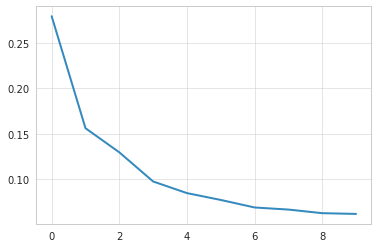

In [ ]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()

Minimum validation loss: 0.04269934818148613


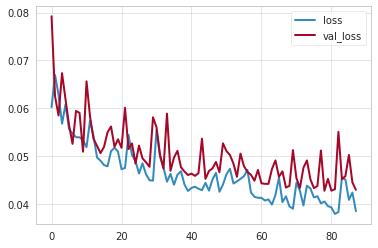

In [ ]:
#importing early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True)

history = model.fit(X_nn_train,y_nn_train,validation_data=(X_valid,y_valid),
                    batch_size = 256,epochs=500,
                   callbacks=[early_stopping],
                   verbose=0)

history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot();
print('Minimum validation loss: {}'.format(history_df['val_loss'].min()))

Minimum validation loss: 0.05546126887202263


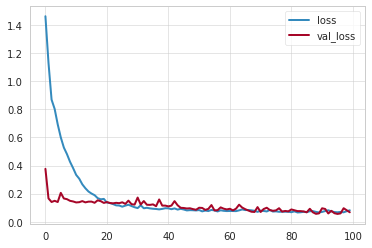

In [ ]:
# model with 4 layers
model = keras.Sequential([
    layers.Dense(units=1024,activation = 'relu', input_shape=[9]),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(units=1024,activation = 'relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(units=1024,activation = 'relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(units=1),
])

model.compile(optimizer='adam',loss='mae')

history = model.fit(X_nn_train,y_nn_train,validation_data=(X_valid,y_valid),
                    batch_size = 256,epochs=100,
                   verbose=0)

history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot();
print('Minimum validation loss: {}'.format(history_df['val_loss'].min()))

Minimum validation loss: 0.056307923048734665


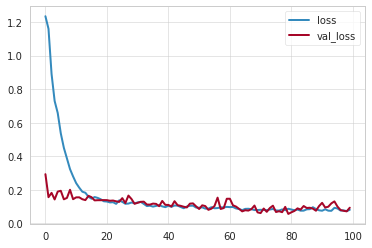

In [ ]:
#model with 6 layers
model = keras.Sequential([
    layers.Dense(units=1024,activation = 'relu', input_shape=[9]),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(units=1024,activation = 'relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(units=1024,activation = 'relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(units=1024,activation = 'relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(units=1024,activation = 'relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(units=1),
])

model.compile(optimizer='adam',loss='mae')

history = model.fit(X_nn_train,y_nn_train,validation_data=(X_valid,y_valid),
                    batch_size = 256,epochs=100,callbacks=[early_stopping],
                   verbose=0)

history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot();
print('Minimum validation loss: {}'.format(history_df['val_loss'].min()))